<h1>3030ICT Assignment</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

%matplotlib inline

df = pd.read_csv('data.csv')

C:\Users\juliu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#check that data was properly loaded and get some initial information about the data
display(df.head(3))
df.info()
print('\nNa values:')
print(df.isna().sum())
print('\nDuplicated rows:', df.duplicated().sum())

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB

Na values:
Id                        0
Title                     0
Company               12004
Date                 

<h2>Part 1 – Data Preparation and Preprocessing. [15 points]</h2>

<h3>1. Describe the dataset. (8 points)</h3>

<ul>
    <li>Describe the dataset (e.g.: type of column, value range). (1 point) </li>
    <li>How many records are there in the dataset? (1 point) </li>
    <li>Which period does it cover? How many different dates have job postings? (1 point) </li>
    <li>How many locations does the dataset have? Which location has the most job postings? (1 point) </li>
    <li>How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings. (1 point) </li>
    <li>Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. (1 point) </li>
    <li>List the salary ranges and their total of job postings. (1 point) </li>
    <li>List the job types. In each job type, what are the lowest salary and highest salary? (1 point)</li>
</ul>

In [3]:
# 1.
#Ben

In [4]:
# 2.
#Ben

In [5]:
# 3.
#Ben

In [6]:
# 4.
#Ben

In [7]:
# 5.
#Ben

In [8]:
# 6.
#Ben

In [9]:
# 7.
#Ben

In [10]:
# 8.
#Ben

<h3>2. Normalize and clean data. (7 points)</h3>

<ul>
    <li>The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job. (1 point)</li>
    <li>The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 point)</li>
    <li>The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)</li>
    <li>Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point) </li>
</ul>

In [11]:
# 1.
df['AverageSalary'] = (df['HighestSalary'] + df['LowestSalary']) / 2
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0


In [12]:
# 2.
print('Before:')
print(df['Id'].describe())
print('Duplicates:', df.duplicated().sum())

# single out only rows with ids not consisting of exactly 8 digits
irregularIdsDf = df[df['Id'].str.match(r'^(?!^\d{8}$).*$', na=False)] 
display(irregularIdsDf.head(3)) # see what the irregular ids look like
print('Shape before slicing: ', irregularIdsDf.shape) # see how many rows have irregular ids

df['Id'] = df['Id'].astype(str) # explicitly set type of Id column as string so each id is iterable
df['Id'] = [x[:8] for x in df['Id']] # reset the id to the first 8 characters of the id

# recheck to see if there are still some irregular ids
irregularIdsDf = df[df['Id'].str.match(r'^(?!^\d{8}$).*$', na=False)] 
print('Shape after slicing: ', irregularIdsDf.shape, '\n')

print('After:')
print(df['Id'].describe(), '\n')
print('Duplicated rows now:', df.duplicated().sum())

df.drop_duplicates(inplace=True)

print('Duplicated rows after dropping:', df.duplicated().sum())

Before:
count       318477
unique      318477
top       37404348
freq             1
Name: Id, dtype: int64
Duplicates: 0


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11T00:00:00.000Z,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,15.0
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,15.0
153769,37915306&searchrequesttoken=e859cc74-e22f-498d...,Part time Café All-rounder in Docklands,Jora Local,2018-12-11T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe/retail shop in Docklands is seeking a p...,NaN,0,30,NaN,15.0


Shape before slicing:  (43462, 14)
Shape after slicing:  (0, 14) 

After:
count       318477
unique      304312
top       37938291
freq             4
Name: Id, dtype: object 

Duplicated rows now: 108
Duplicated rows after dropping: 0


In [13]:
# drop duplicated rows
df.drop_duplicates(subset=['Id'], inplace=True)
print('Duplicated rows now:', df.duplicated(subset=['Id']).sum())
df.shape

Duplicated rows now: 0


(304312, 14)

In [14]:
# 3.
print('Before:')
print(df['Date'].describe())
display(df.head(1))

df['Date'] = pd.to_datetime(df['Date']) # convert to datetime
df['Date'] = df['Date'].dt.date # format to only date

print('After:')
print(df['Date'].describe())
display(df.head(1))

Before:
count                       304312
unique                         163
top       2018-10-17T00:00:00.000Z
freq                         13059
Name: Date, dtype: object


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0


After:
count         304312
unique           163
top       2018-10-17
freq           13059
Name: Date, dtype: object


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0


In [15]:
# 4.
print('Before:')
print(df.dtypes, '\n')
df['Id'] = pd.to_numeric(df['Id'])
print('After:')
print(df.dtypes)

Before:
Id                    object
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
AverageSalary        float64
dtype: object 

After:
Id                     int64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
AverageSalary        float64
dtype: object


<h2>Part 2 – Data Understanding. [5 points] </h2>

<ul>
    <li>Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)</li>
    <li>Display the list of job types and the number of jobs of each type using pie chart. (1 point)</li>
    <li>Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point)</li>
    <li>Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)</li>
    <li>Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)</li>
</ul>

,AverageSalary,Count
0,15.0,62476
1,45.0,32756
2,75.0,26777
3,110.0,26672
4,65.0,26266
5,55.0,25222
6,175.0,24227
7,90.0,24199
8,35.0,23044
9,135.0,22453


Text(0, 0.5, 'Count')

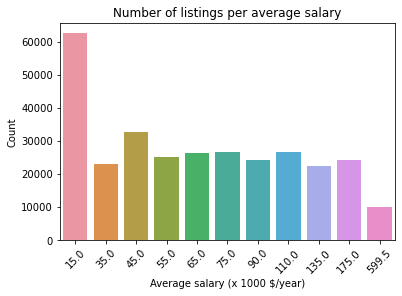

In [16]:
# 1.
# create a new dataframe with the occurances of each average salary value
salaryDistribution = df['AverageSalary'].value_counts().rename_axis('AverageSalary').reset_index(name='Count')
display(salaryDistribution)

salaryDistChart = sns.barplot(x='AverageSalary', y='Count', data=salaryDistribution)
salaryDistChart.set_xticklabels(salaryDistChart.get_xticklabels(), rotation=45)
plt.title('Number of listings per average salary')
plt.xlabel('Average salary (x 1000 $/year)')
plt.ylabel('Count')

List of unique job types:
[nan 'Full Time' 'Contract/Temp' 'Part Time' 'Casual/Vacation']


,JobType,Count
0,Full Time,192395
1,Contract/Temp,51581
2,Casual/Vacation,24344
3,Part Time,20959


Text(0.5, 1.0, 'Listings by job type')

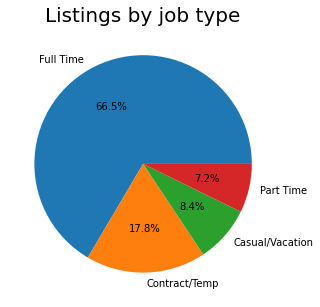

In [17]:
# 2.
print('List of unique job types:')
print(df['JobType'].unique())

typeDistribution = df['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')
display(typeDistribution)

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(typeDistribution['Count'], labels=typeDistribution['JobType'], autopct='%1.1f%%')
plt.title('Listings by job type', size=20)

List of unique classifications:
['Retail & Consumer Products' 'Call Centre & Customer Service'
 'Hospitality & Tourism' 'Banking & Financial Services'
 'Manufacturing, Transport & Logistics' 'Sales'
 'Administration & Office Support' 'Trades & Services' 'Accounting'
 'Real Estate & Property' 'Healthcare & Medical'
 'Marketing & Communications' 'Government & Defence'
 'Information & Communication Technology' 'Education & Training'
 'Community Services & Development' 'Mining, Resources & Energy'
 'Human Resources & Recruitment' 'Insurance & Superannuation'
 'Engineering' 'CEO & General Management' 'Design & Architecture' 'Legal'
 'Construction' 'Sport & Recreation' 'Science & Technology'
 'Advertising, Arts & Media' 'Farming, Animals & Conservation'
 'Self Employment' 'Consulting & Strategy' nan]


,Classification,Count
0,Information & Communication Technology,21024
1,Trades & Services,16884
2,Healthcare & Medical,15771
3,Hospitality & Tourism,14360
4,"Manufacturing, Transport & Logistics",11570
5,Administration & Office Support,9464
6,Accounting,8698
7,Education & Training,8603
8,Construction,7738
9,Sales,7561


Text(0, 0.5, 'Classification')

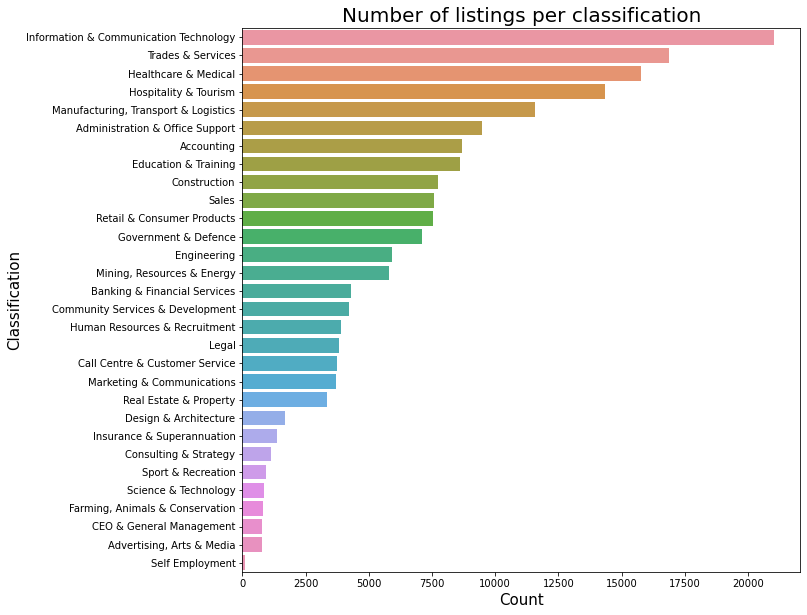

In [18]:
# 3.
print('List of unique classifications:')
print(df['Classification'].unique())

classificationDistribution = df['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
display(classificationDistribution)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(ax=ax, data=classificationDistribution, x='Count', y='Classification')
plt.title('Number of listings per classification', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Classification', size=15)

In [19]:
# 4.
#Ben

In [20]:
# 5.
#Ben

<h2>Part 3 – Data Analysis and Visualisation. [6 points]</h2>

<h3>1. Analyse by comparison. (2 points)</h3>

Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:
<ul>
    <li>Which city has more jobs? How many jobs each type (casual, fulltime, etc.) are there in each city? </li>
    <li>In each city, which are top 5 job sectors? How many jobs are there in each sector? </li>
    <li>Visualise the top 5 job sectors in pie chart for each city.* </li>
    <li>In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid? </li>
    <li>List top 5 companies in each city? Which sectors do they belong to? </li>
    <li>Between 2 cities, which do you think it is better for employees. Explain your choice.*</li>
<ul>

In [21]:
# We chose Brisbane and Adelaide
# 1.
brisbane = df.loc[df['Location'] == 'Brisbane'].copy()
adelaide = df.loc[df['Location'] == 'Adelaide'].copy()

print('Number of job listings in Brisbane:', brisbane.shape[0])
print('Number of job listings in Adelaide:', adelaide.shape[0], '\n')
print('Brisbane has more jobs.')

Number of job listings in Brisbane: 19995
Number of job listings in Adelaide: 6156 

Brisbane has more jobs.


In [22]:
brisbane['JobType'].fillna('Unspecified', inplace=True)
adelaide['JobType'].fillna('Unspecified', inplace=True)
brisbaneTypeDist = brisbane['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')
adelaideTypeDist = adelaide['JobType'].value_counts().rename_axis('JobType').reset_index(name='Count')

print('Brisbane:')
display(brisbaneTypeDist)

print('\nAdelaide:')
display(adelaideTypeDist)

Brisbane:


,JobType,Count
0,Full Time,12135
1,Contract/Temp,3829
2,Casual/Vacation,1771
3,Part Time,1135
4,Unspecified,1125



Adelaide:


,JobType,Count
0,Full Time,3662
1,Contract/Temp,988
2,Casual/Vacation,730
3,Part Time,470
4,Unspecified,306


In [23]:
# 2.
brisbane['Classification'].fillna('Unspecified', inplace=True)
adelaide['Classification'].fillna('Unspecified', inplace=True)
brisbaneClassificationDist = brisbane['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')
adelaideClassificationDist = adelaide['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')

print('Brisbane:')
display(brisbaneClassificationDist.head())

print('\nAdelaide:')
display(adelaideClassificationDist.head())

Brisbane:


,Classification,Count
0,Information & Communication Technology,2556
1,Trades & Services,1898
2,Healthcare & Medical,1690
3,"Manufacturing, Transport & Logistics",1567
4,Hospitality & Tourism,1239



Adelaide:


,Classification,Count
0,Trades & Services,761
1,Healthcare & Medical,728
2,"Manufacturing, Transport & Logistics",518
3,Information & Communication Technology,480
4,Hospitality & Tourism,461


Text(0.5, 1.0, 'Listings by classification (Adelaide)')

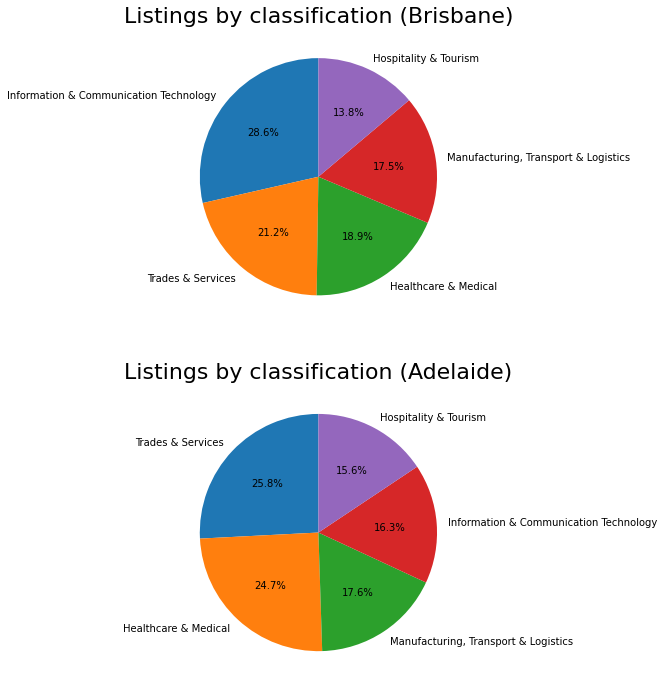

In [24]:
# 3.
brisbaneTop5Classification = brisbaneClassificationDist.sort_values('Count', ascending = False).head(5)
adelaideTop5Classification = adelaideClassificationDist.sort_values('Count', ascending = False).head(5)

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].pie(brisbaneTop5Classification['Count'], labels=brisbaneTop5Classification['Classification'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Listings by classification (Brisbane)', size=22)

axs[1].pie(adelaideTop5Classification['Count'], labels=adelaideTop5Classification['Classification'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Listings by classification (Adelaide)', size=22)

In [25]:
# 4.
#Ben

In [26]:
# 5.
#Ben

In [27]:
# 6.
#Ben

<h3>2. Analyse by time. (2 points) </h3>

In this part, we will analyse the jobs based on the posting date. 
<ul>
    <li>Visualise the number of job posts by month</li>
    <li>Visualise the number of job posts by day of week.</li>
    <li>Visualise the number of job posts by day of the month.</li>
    <li>Visualise trending of the job postings for the big cities.*</li>
    <li>Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.</li>
</ul>

In [28]:
# 1.
#Ben

In [29]:
# 2.
#Ben

In [30]:
# 3.
#Ben

In [31]:
# 4.
#Ben

In [32]:
# 5.
#Ben

<h3>3. Forecasting and skill extractions. (2 points)</h3>

<ul>
    <li>Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**</li>
    <li>Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.</li>
</ul>


Text(0, 0.5, 'Count')

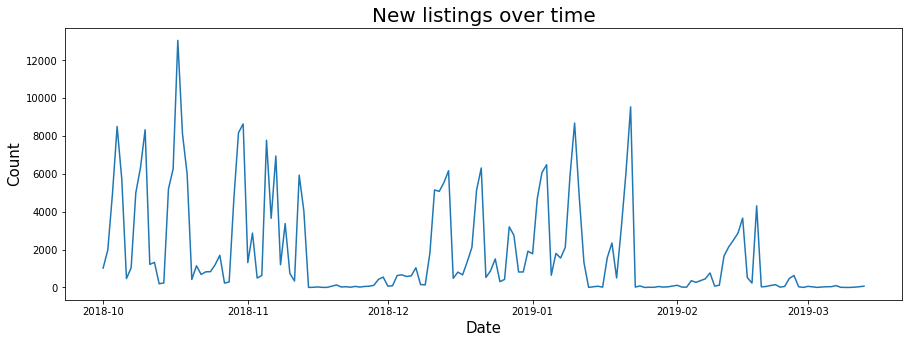

In [33]:
# 1.
dateDistribution = df.copy()

dateDistribution = dateDistribution['Date'].value_counts().rename_axis('Date').reset_index(name='Count')
dateDistribution.sort_values(by='Date', inplace=True, ignore_index=True)

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(ax=ax, data=dateDistribution, x='Date', y='Count')
plt.title('New listings over time', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Count', size=15)

In [34]:
def get_moving_average(data, k, to_period):
    ma_df = pd.DataFrame(columns=['Date','Count'])
    for m in range(0, to_period):
        if m < k:
            if m == 0:
                prediction = data['Count'][0]
            else:
                history = data['Count'][0:m]
                prediction = history.mean()            
        else:
            history = data['Count'][m-k:m]
            prediction = history.mean()
        ma_df.loc[m] = [data.Date[0] + pd.Timedelta(days=m+1), prediction]       
    return ma_df

Text(0, 0.5, 'Count')

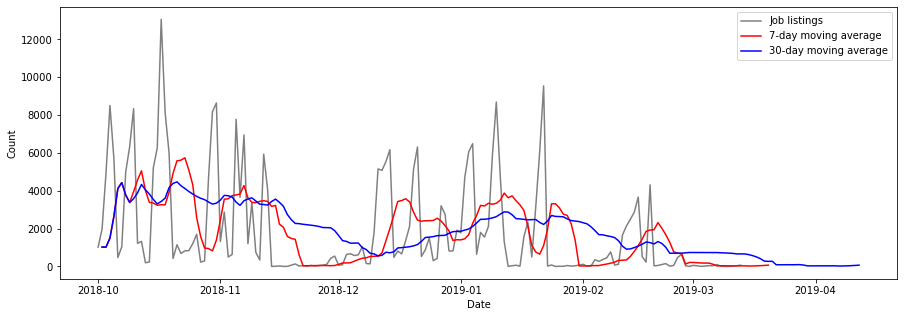

In [35]:
periodLength = dateDistribution.shape[0]

seven_day_ma = get_moving_average(dateDistribution, 7, periodLength+7)
thirty_day_ma = get_moving_average(dateDistribution, 30, periodLength+30)

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(ax=ax, data=dateDistribution, x='Date', y='Count', color='gray')
sns.lineplot(ax=ax, data=seven_day_ma, x='Date', y='Count', color='r')
sns.lineplot(ax=ax, data=thirty_day_ma, x='Date', y='Count', color='b')

ax.legend(labels=['Job listings', '7-day moving average', '30-day moving average'])
ax.set_xlabel('Date')
ax.set_ylabel('Count')

Neither the 7-day moving average (7MA) or the 30-day moving average (30MA) appear to represent the original data very well. The original data appears to be very erratic with high random variation, little apparent seasonality, and a relatively flat macroscopic trend. The 7MA is clearly more responsive to fluctuations in the original data, and therefore might be better for shorter timeframes. The 30MA on the other hand is more stable, and may be more appropriate for determining the overall trends in the data. Both forecasts predict little to no new job listings after the original data end, which seems highly unlikely. The 30MA appears to better capture the larger scale trends better than the 7MA. The fluctuations reflected by the 7MA are generally not accurate and for the most part misaligned with the actual data. Based on the points outlined here, the 30MA is a better forecast model for this timeseries. 

In [36]:
# 2.
# import needed modules
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
#Favourite sector/classification: Information & Communication Technology
ict = df.loc[df['Classification'] == 'Information & Communication Technology'].copy()
display(ict.head(3))
ict.shape

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
89,37404291,Technical Support Engineer,FTI Consulting,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Act as an advisor to staff in all practice are...,NaN,0,30,NaN,15.0
96,37404325,Business Development Manager,TPG Telecom Limited,2018-10-07,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Sales - Pre & Post,Looking to get your foot in the door in a care...,NaN,0,30,NaN,15.0
127,37404230,Systems Engineer,Humanised Group,2018-10-07,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time,15.0


(21024, 14)

In [38]:
# Preprocessing
# Tokenize
ict['tokens'] = ict.apply(lambda row: word_tokenize(row['Requirement']), axis=1)

# Remove punctuation
ict['alpha'] = ict['tokens'].apply(lambda x: [item for item in x if item.isalpha()])

# Remove stop words
stop_words = stopwords.words('english')
ict['stop'] = ict['alpha'].apply(lambda x: [item for item in x if item not in stop_words])

# Stem
stemmer = PorterStemmer()
ict['stemmed'] = ict['stop'].apply(lambda x: [stemmer.stem(item) for item in x])
ict['stemmed']

89        [act, advisor, staff, practic, area, it, issu,...
96        [look, get, foot, door, career, sale, join, on...
127       [system, engin, work, lead, msp, treat, employ...
130       [readi, challeng, opportun, part, one, excit, ...
133       [do, strong, technic, support, skill, love, wo...
                                ...                        
197204    [senior, data, engin, requir, build, devic, io...
197208    [multipl, job, opportun, canberra, locat, tspv...
197217                    [abil, deliv, wide, feder, model]
197218    [great, opportun, it, test, it, test, analyst,...
197228    [vmware, engin, need, vmware, migrat, project,...
Name: stemmed, Length: 21024, dtype: object

In [39]:
# Compute the BOW
vectorizer = CountVectorizer(lowercase = False, analyzer = lambda x: x)
bow = vectorizer.fit_transform(ict['stemmed']).toarray()
bow.shape

(21024, 5766)

In [40]:
# Compute the TF 
tf = pd.DataFrame(data=bow, columns=vectorizer.get_feature_names())
tf = tf.divide(tf.sum(axis=1), axis=0)

# Compute the IDF
idf = pd.DataFrame(data=bow, columns=vectorizer.get_feature_names())
idf[idf>1] = 1
idf = np.log(len(idf)/idf.sum(axis=0))

# Compute the TF-IDF
tfidf = tf * idf
tfidf

,a,aa,aaa,aam,aaron,abap,abbotsford,abc,abil,abl,...,zealand,zendesk,zeplin,zero,zetta,znode,zoho,zone,zoo,zscaler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.127186,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# 25 words with the highest TF-IDF on average
print('Hightst ranked words words:')
print(tfidf.max(axis=0).sort_values(ascending=False)[:5])

Hightst ranked words words:
avocado      9.953420
tibco        7.245370
till         6.192220
interview    5.635932
bau          5.487512
dtype: float64


In [42]:
top50ict = tfidf.max(axis=0).sort_values(ascending=False)[:50]
top50ict.head()

avocado      9.953420
tibco        7.245370
till         6.192220
interview    5.635932
bau          5.487512
dtype: float64

In [43]:
# export to .csv file that can be used to generate word cloud 
top50ict.to_csv('top50ict.csv', sep=';')

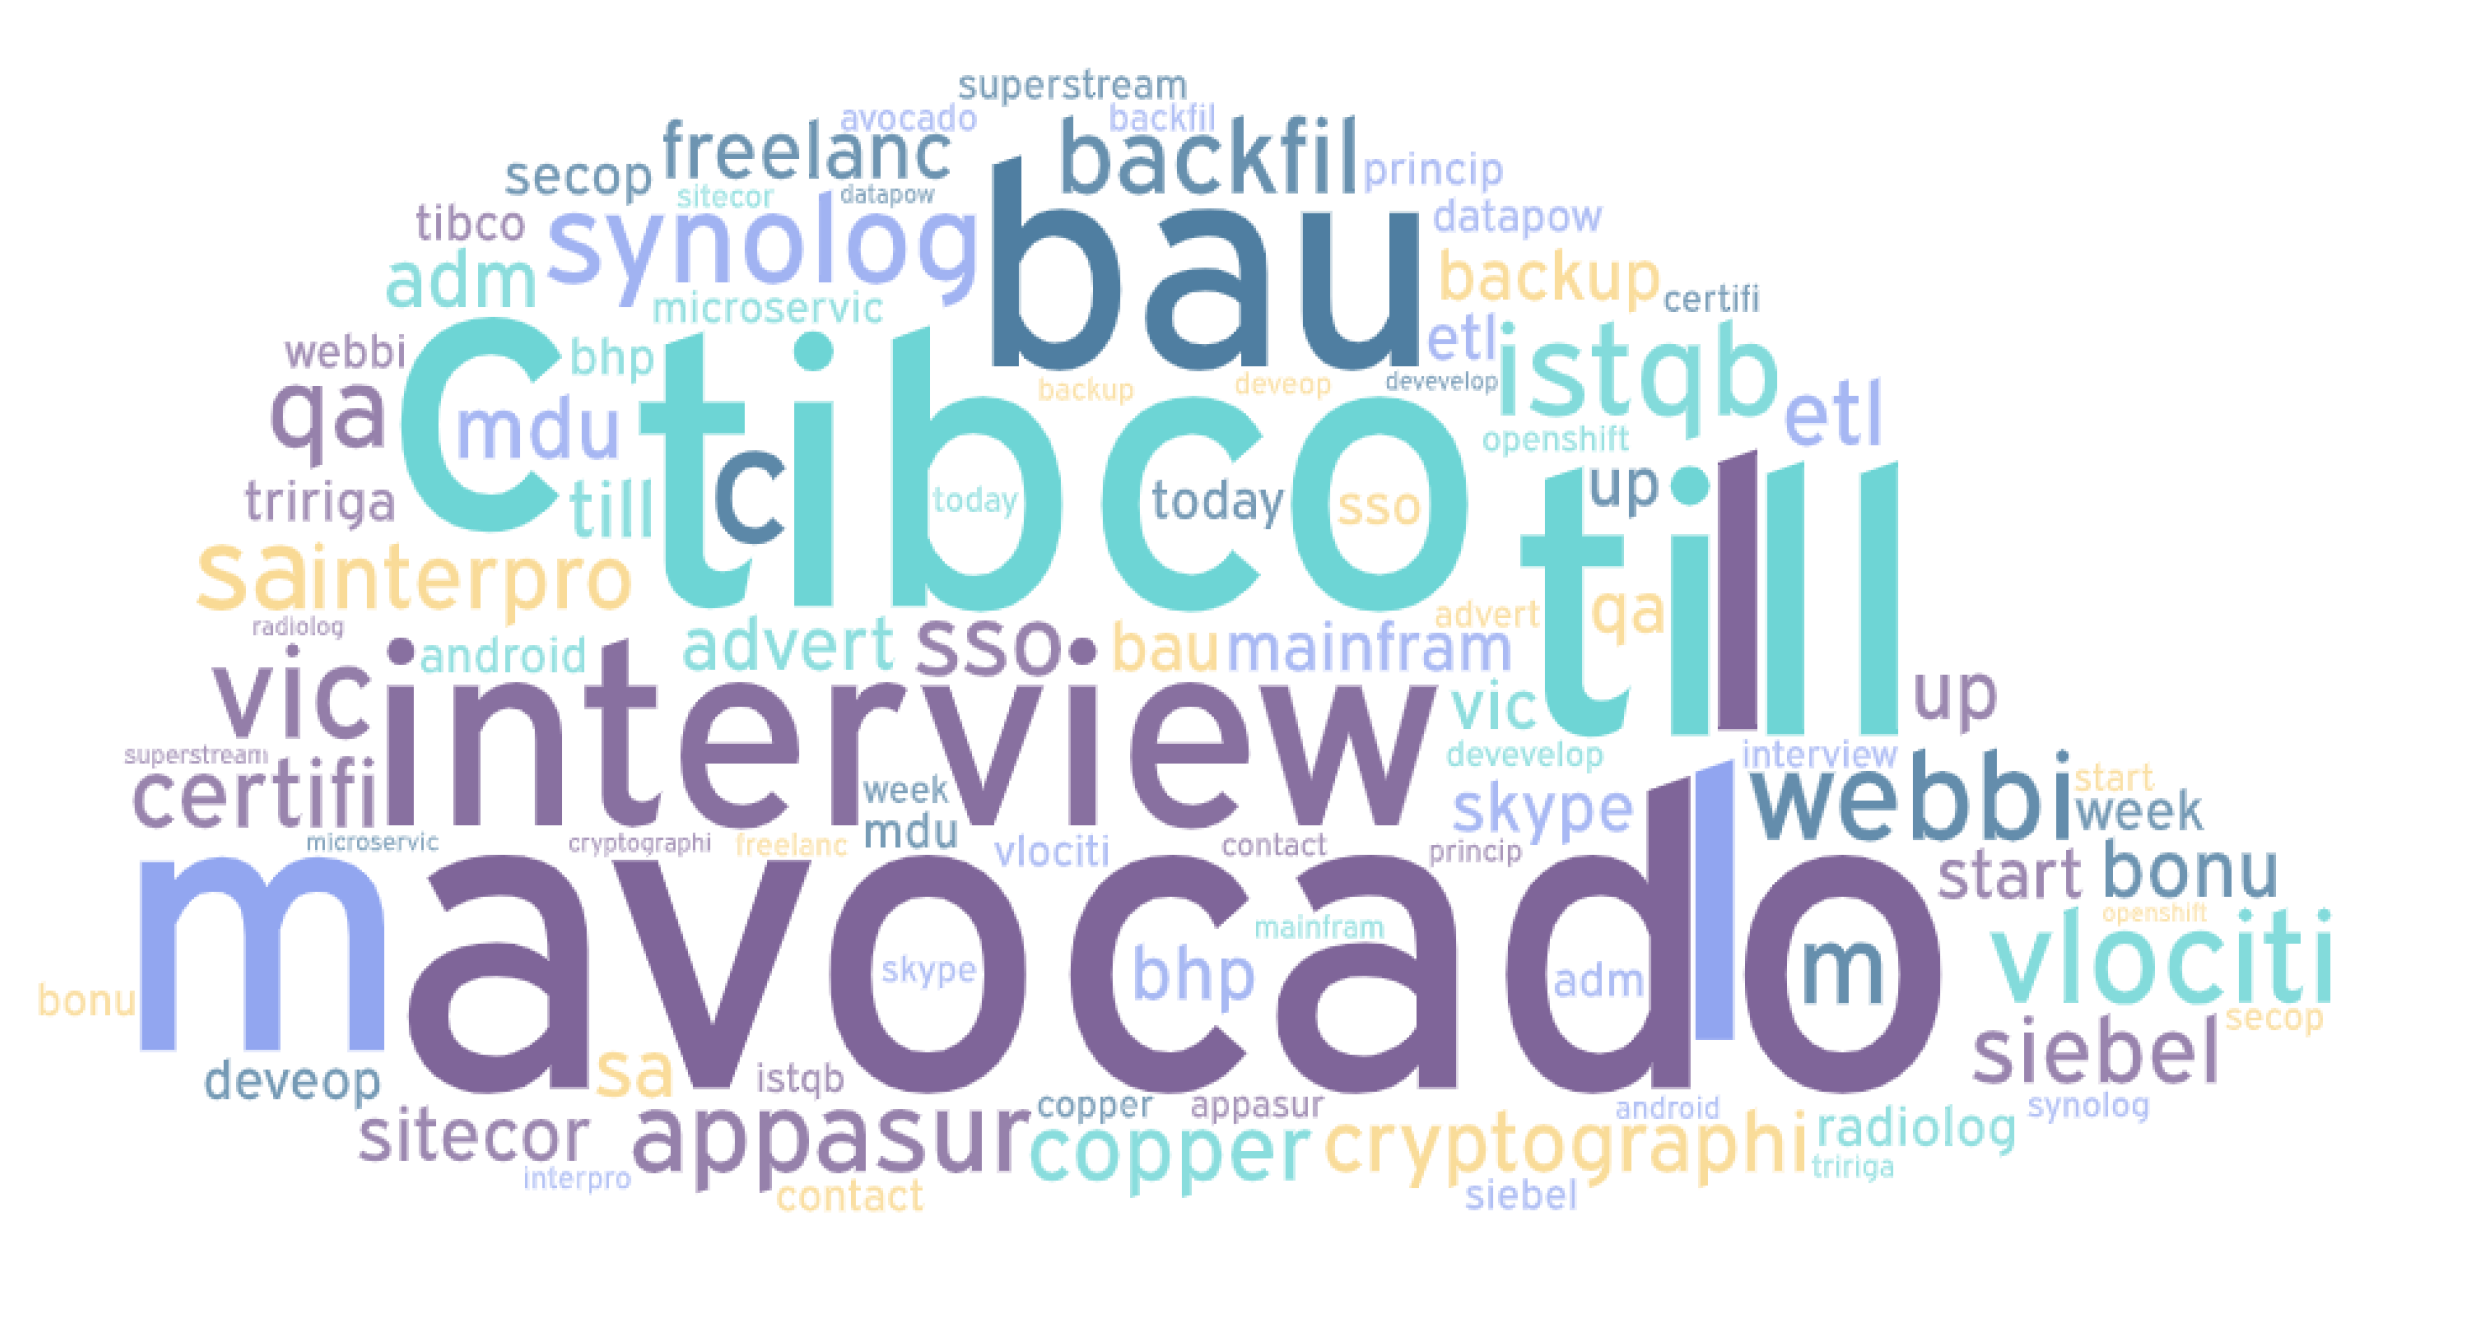

<h2>Part 4 – Discussion. [4 points] </h2>

<ul>
    <li><strong>Scenario 1:</strong> Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words) </li>
    <li><strong>Scenario 2:</strong> To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)</li>
</ul>

<h4>Scenario 1</h4>

In [44]:
#Ben

<h4>Scenario 2</h4>

In order to fully explore Scenario 2 and provide the best recommendation, looking at which sectors/classifications have the most listings is a reasonable place to start. Considering that Griffith's campuses are located in the Brisbane area, it is also reasonable to take a closer look at job postings in the Brisbane area in particular.

<h5>Number of jobs</h5>

In [45]:
allLocClassificationDist = df['Classification'].value_counts().rename_axis('Classification').reset_index(name='Count')

print('Top sectors/classifications - Brisbane:')
display(brisbaneClassificationDist.head())

print('\n\nTop sectors/classifications - all locations:')
display(allLocClassificationDist.head())

brisTop5 = brisbaneClassificationDist['Classification'].head(5).to_list()
allTop5 = allLocClassificationDist['Classification'].head(5).to_list()

Top sectors/classifications - Brisbane:


,Classification,Count
0,Information & Communication Technology,2556
1,Trades & Services,1898
2,Healthcare & Medical,1690
3,"Manufacturing, Transport & Logistics",1567
4,Hospitality & Tourism,1239




Top sectors/classifications - all locations:


,Classification,Count
0,Information & Communication Technology,21024
1,Trades & Services,16884
2,Healthcare & Medical,15771
3,Hospitality & Tourism,14360
4,"Manufacturing, Transport & Logistics",11570


The outputs above show the 5 top and 5 bottom job sectors/classifications by number of postings for both the Brisbane area and for all locations. The top sectors based on job postings are consistent between the Brisbane area and all locations, and it is immediately apparent that Information & Communication Technology (ICT) has significantly more job postings than any other sector in both Brisbane and across all locations, indicating a high demand for ICT expertise in the job market. Trades & Services and Healthcare & Medical were runner ups in both sets, with similar numbers of postings. Manufacturing, Transport & Logistics were 4th and Hospitality & Tourism 5th for Brisbane. It was the other way around for all locations. These top 5 sectors appear to be a good starting point for further analysis to base the recommendation on.

<h5>Job types</h5>

It is assumed that graduates will mainly be looking for full-time work, but contract or temporary positions might also be favourable in some cases by providing more flexibility. Hence looking at the job type proportions for the top 5 classifications is useful.

In [46]:
def print_job_type_distribution_for_classifications(classifications, df, location):
    fig, ax = plt.subplots(figsize=(8, 5))
    top5ClassListings = df[df['Classification'].isin(classifications)]
    typeDistChart = sns.countplot(ax=ax, x='JobType', hue='Classification', data=top5ClassListings)
    typeDistChart.set_xticklabels(typeDistChart.get_xticklabels())
    plt.title('Number of listings per job type for top 5 sectors - ' + location)
    plt.legend()
    plt.xlabel('Job type')
    plt.ylabel('Count')

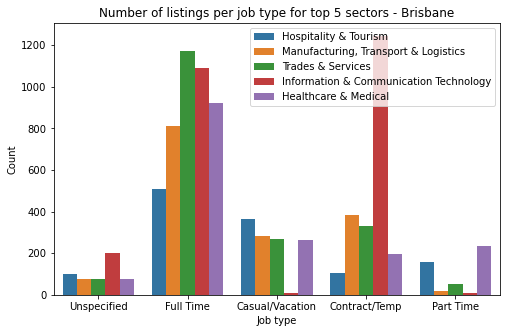

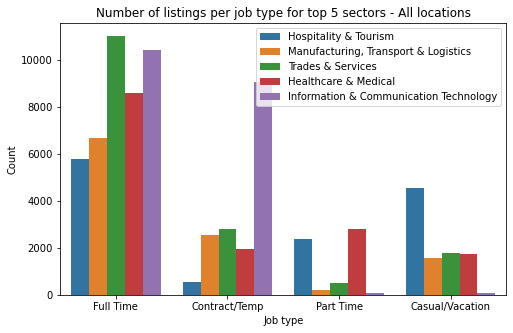

In [47]:
print_job_type_distribution_for_classifications(brisTop5, brisbane, 'Brisbane')
print_job_type_distribution_for_classifications(allTop5, df, 'All locations')

ICT has ample listings for both full-time and contract/temp positions in Brisbane and across all locations. Healthcare & Medical and Trades & Services are the make up the other top two sectors in the full-time category.

<h5>Pay</h5>

Salary is not everything when choosing a career path and education, and factors such as interests, values, priorities, and environmental influences will always have some impact on which degree new students decide to pursue. However, it is reasonable to assume that degrees resulting in higher paying jobs will be in higher demand compared to degrees generally leading to lower paying positions. Salary may therefore be a good indicator for which professions are in high demand and which career paths new students may find attractive. 

In [48]:
def print_salary_distribution_for_classifications(classifications, df, location):
    fig, ax = plt.subplots(figsize=(15, 10))
    top5ClassListings = df[df['Classification'].isin(classifications)]
    salaryDistChart = sns.countplot(ax=ax, x='AverageSalary', hue='Classification', data=top5ClassListings)
    salaryDistChart.set_xticklabels(salaryDistChart.get_xticklabels())
    plt.title('Number of listings per average salary for top 5 sectors - ' + location)
    plt.legend()
    plt.xlabel('Average salary (x 1000 $/year)')
    plt.ylabel('Count')
    
def get_sectors_average_pay(classifications, df):
    avg_pay_by_class = pd.DataFrame(columns=['Classification', 'AverageSalary'])
    for classification in classifications:
        avgSal = df.loc[df['Classification'] == classification]['AverageSalary'].mean()
        avg_pay_by_class = pd.concat(
            [
                avg_pay_by_class, 
                pd.DataFrame([[classification, avgSal]], columns =['Classification', 'AverageSalary'])
            ], 
            ignore_index=True)
    return avg_pay_by_class

Brisbane


,Classification,Count,AverageSalary
0,Information & Communication Technology,2556,179.808490
1,Trades & Services,1898,49.947313
2,Healthcare & Medical,1690,121.927219
3,"Manufacturing, Transport & Logistics",1567,55.031589
4,Hospitality & Tourism,1239,40.314770




All locations


,Classification,Count,AverageSalary
0,Information & Communication Technology,21024,175.001070
1,Trades & Services,16884,52.407812
2,Healthcare & Medical,15771,114.843605
3,Hospitality & Tourism,14360,39.361490
4,"Manufacturing, Transport & Logistics",11570,57.329948


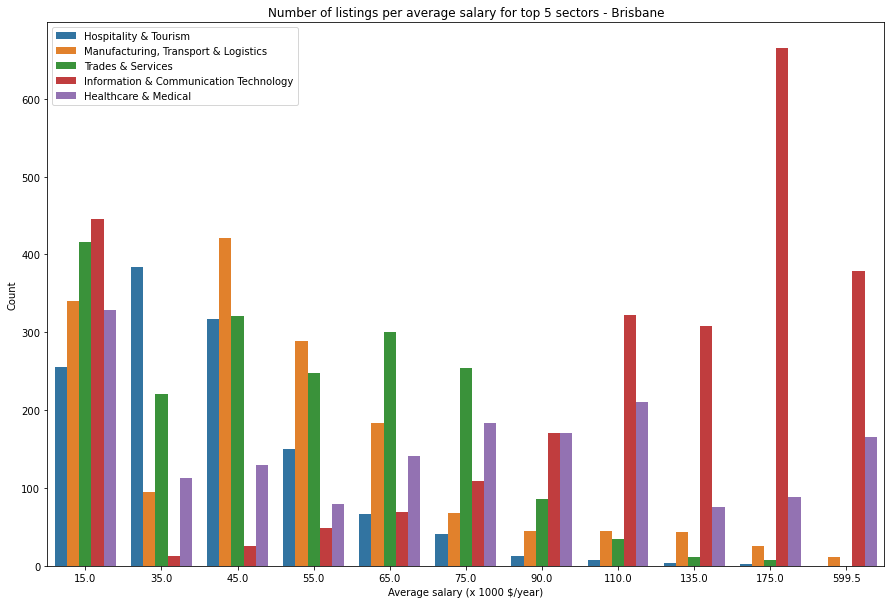

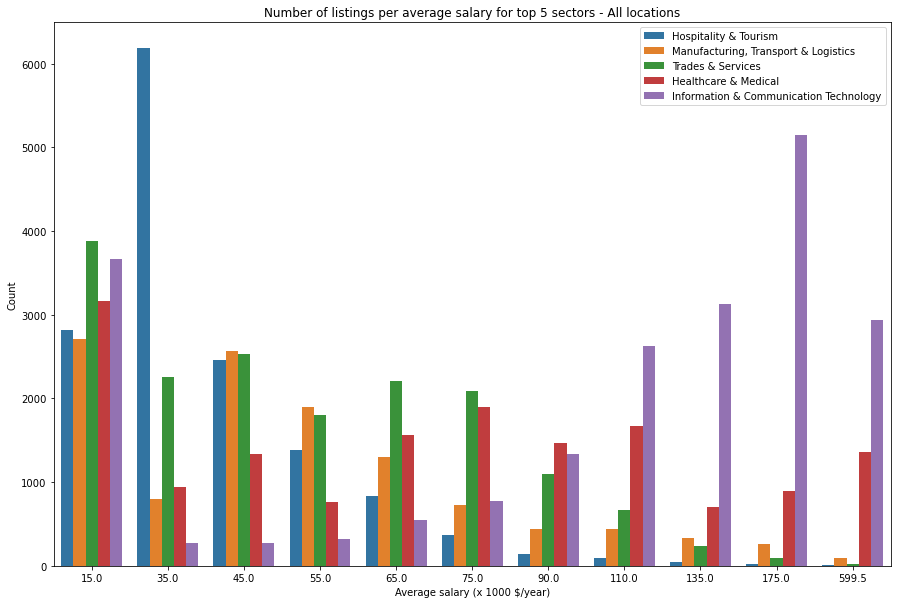

In [49]:
print_salary_distribution_for_classifications(brisTop5, brisbane, 'Brisbane')
print_salary_distribution_for_classifications(allTop5, df, 'All locations')

brisTop5Pay = get_sectors_average_pay(brisTop5, brisbane)
BrisClassPay = brisbaneClassificationDist.head(5).copy()
BrisClassPay['AverageSalary'] = brisTop5Pay['AverageSalary']
print('Brisbane')
display(BrisClassPay)

allTop5Pay = get_sectors_average_pay(allTop5, df)
allLocClassPay = allLocClassificationDist.head(5).copy()
allLocClassPay['AverageSalary'] = allTop5Pay['AverageSalary']
print('\n\nAll locations')
display(allLocClassPay)

For Brisbane, ICT and Healthcare & Medical have by far the highest average salaries, with the ICT average being over 3 times higher than the other 3. Healthcare is over double 2 of the others, and 3 times that of Hospitality & Tourism. The same is true for all locations. ICT and Healthcare & Medical average salaries are slightly higher in Brisbane compared to across all locations (175.0 vs 179.8 and 114.8 vs 121.9 respectively). 

Looking at the average salary distributions, it is clear that ICT and Healthcare & Medical dominate the higher pay categories. The ICT distribution resembles that of a left skewed normal distribution, while Healthcare & Medical is relatively stable across all categories. The final 3 categories mostly occupy that lower end of the spectrum with almost a linear trend downwards approaching the other side of the scale. This is true for both location sets, except Hospitality & Tourism which has a massive spike at 35 for all locations.

<h5>Bottom sectors</h5>

Number of jobs, average salary and salary distribution, as well as job type distribution will be used to examine the bottom 5 sectors for Brisbane and across the whole data set to determine in which areas Griffith University should decrease admissions.

In [50]:
brisBottom5 = brisbaneClassificationDist['Classification'].tail(5).to_list()
allBottom5 = allLocClassificationDist['Classification'].tail(5).to_list()

brisBottom5Pay = get_sectors_average_pay(brisBottom5, brisbane)
BrisBottomClassPay = brisbaneClassificationDist.tail(5).reset_index(drop=True).copy()
BrisBottomClassPay['AverageSalary'] = brisBottom5Pay['AverageSalary']
print('Brisbane')
display(BrisBottomClassPay)

allBottom5Pay = get_sectors_average_pay(allBottom5, df)
allLocBottomClassPay = allLocClassificationDist.tail(5).reset_index(drop=True).copy()
allLocBottomClassPay['AverageSalary'] = allBottom5Pay['AverageSalary']
print('\n\nAll locations')
display(allLocBottomClassPay)

Brisbane


,Classification,Count,AverageSalary
0,CEO & General Management,93,283.688172
1,Sport & Recreation,93,52.258065
2,"Farming, Animals & Conservation",53,46.886792
3,"Advertising, Arts & Media",51,55.196078
4,Self Employment,7,111.428571




All locations


,Classification,Count,AverageSalary
0,Science & Technology,839,99.498212
1,"Farming, Animals & Conservation",821,56.063337
2,CEO & General Management,791,251.261694
3,"Advertising, Arts & Media",790,70.391772
4,Self Employment,88,87.090909


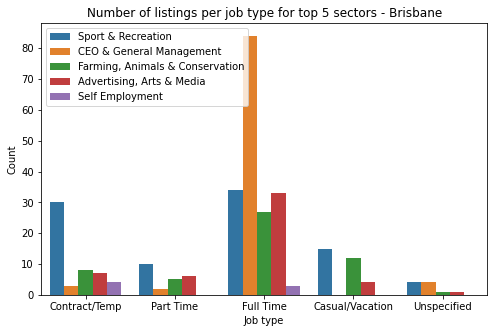

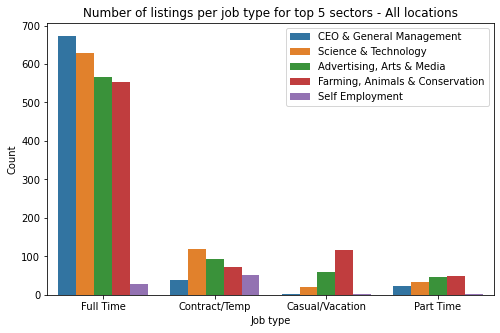

In [51]:
print_job_type_distribution_for_classifications(brisBottom5, brisbane, 'Brisbane')
print_job_type_distribution_for_classifications(allBottom5, df, 'All locations')

Now that an argument can be made for which degrees to increase admissions for, which degrees to cut admissions for must be determined. The bottom 5 sectors by posting counts for each location set will be the starting point. There is no need to consider the sectors where Griffith does not offer any applicable degree, so for Brisbane CEO & General Management, Sport & Recreation, and Advertising, Arts & Media will be considered, while for all locations it will be Science and Technology, CEO & General Management, and Advertising, Arts & Media.

Looking at average salary first, it is obvious that the average salaries for CEO & General Management is, perhaps not surprisingly, very high for both sets (283.7 and 251.2 for Brisbane and all locations respectively). Science & Technology also had a relatively high average salary (99.5 for all locations). Sports & Recreation had only 52.3 (for Brisbane), and Advertising, Arts & Media had 55.2 and 70.4 for Brisbane and all locations respectively. Finally, the sectors mostly offer full time positions, with Sport & Recreation also having a relatively high number of listings as contract/temp positions.

<h5>Conclusion</h5>

Based on the information presented above, it is recommended that Griffith increase admissions across the ICT degrees due to the high number of listings, high amount of full-time employment, and high pay. Demand for ICT professionals also appear to be high not only in Brisbane, but across the whole data set. Healthcare & Medical degrees should also be considered for raising admission numbers. Much like ICT, the sector has a relatively high number of postings, high average pay, and high proportion of full-time positions. Both ICT and Healthcare & Medical have a higher average salary in the Brisbane area compared to across all locations, which could make them even more relevant for Griffith. On the other hand, degrees in Sport & Recreation and Advertising, Arts & Media have few job postings, indicating low demand, in addition to featuring a relatively low average pay. Furthermore, the average salary for Advertising, Arts & Media is lower in the Brisbane area compared to all locations, suggesting that the job market may be more saturated with professionals in these fields in the Brisbane area, further lowering demand. It is therefore recommended that admissions for degrees in these two sectors are reduced in favour of ICT and Healthcare & Medical.


Further analysis could be performed by timeseries analysis of specific sectors to forecast future demand, should it be necessary to support these recommendations further. However, at this point it is believed that sufficient supporting arguments have been illustrated and presented.